<a href="https://colab.research.google.com/github/lovefamilykien/AI/blob/main/AI5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
from sklearn.linear_model import LinearRegression

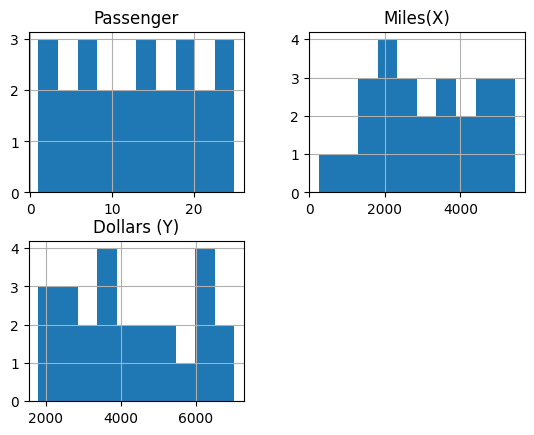

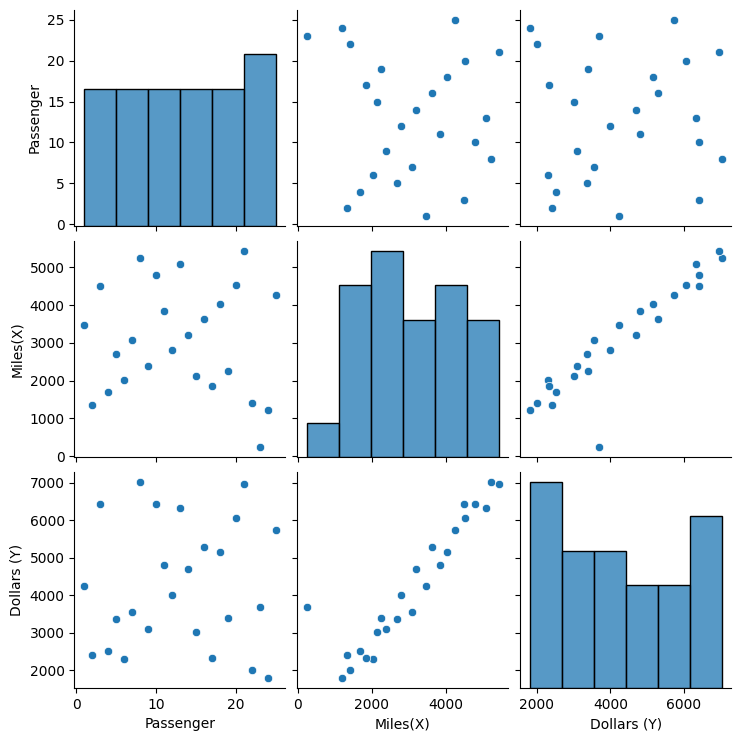

In [2]:
url = 'passenger.csv'
data = pd.read_csv(url)
data.hist()
plt.show()
sns.pairplot(data) # Hiển thị data

In [3]:
correlation = data.corr()
print(correlation)

             Passenger  Miles(X)  Dollars (Y)
Passenger     1.000000 -0.067441     0.050511
Miles(X)     -0.067441  1.000000     0.921729
Dollars (Y)   0.050511  0.921729     1.000000


<Axes: >

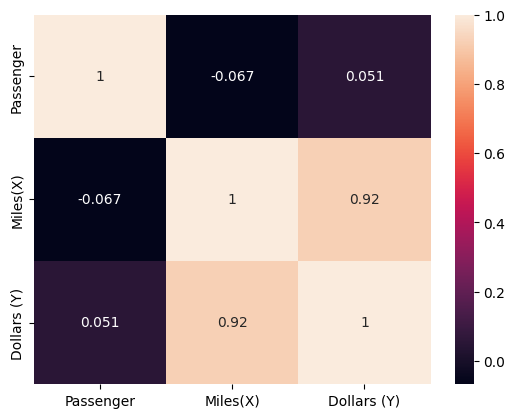

In [4]:
sns.heatmap(correlation, annot = True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Miles(X)', ylabel='Dollars (Y)'>

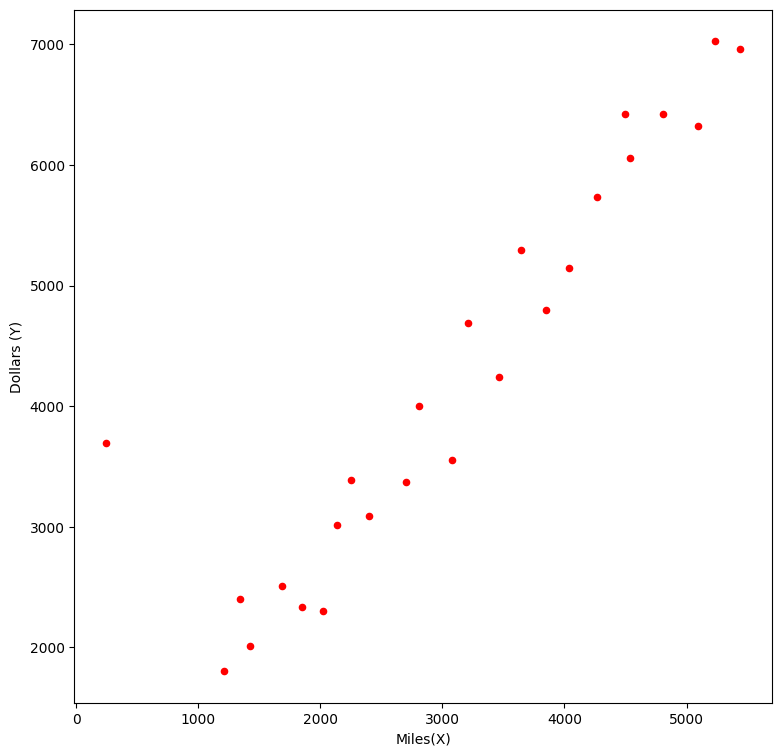

In [5]:
data.plot(kind = 'scatter', x = 'Miles(X)', y = 'Dollars (Y)', figsize=(9,9), color = 'red')

In [6]:
model = linear_model.LinearRegression()
model.fit(X = pd.DataFrame(data['Miles(X)']), y = data['Dollars (Y)']) #qua trinh hoc va dieu chinh cho may
print(model.intercept_)  # hang so b
print(model.coef_) # he so goc a
model.score(X = pd.DataFrame(data['Miles(X)']), y = data['Dollars (Y)']) #độ chính xác bao nhiêu %

934.5366384552517
[1.07802533]


0.8495847755547029

Intercept của mô hình : 4060.482845976633
Coefficent của mô hình : [-2.77719956e+00  1.26814625e-03 -1.22050424e-07]
Độ chính xác của mô hình : 0.9623891949969419


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


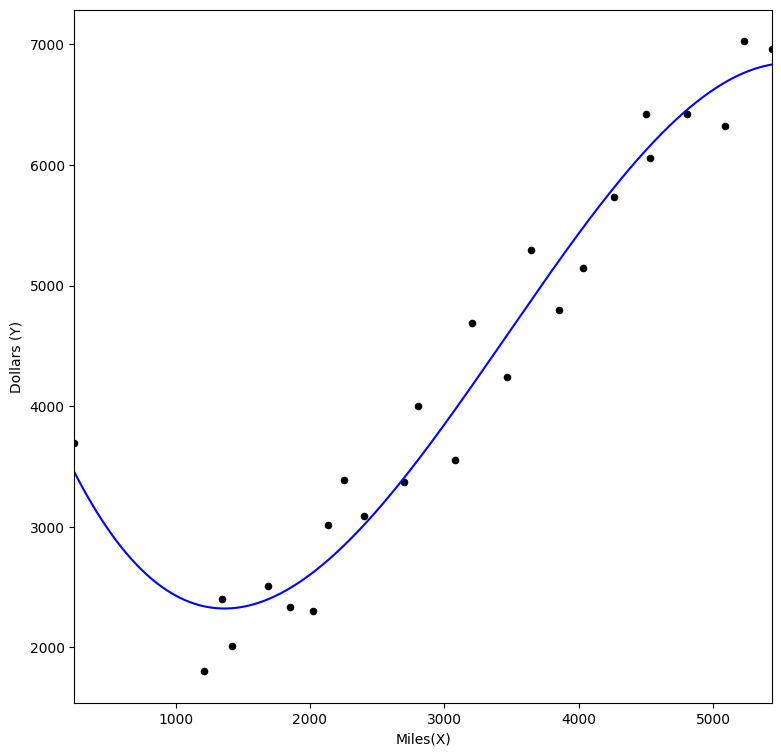

In [7]:
model = linear_model.LinearRegression() # Tạo mô hình mới
X = pd.DataFrame([data['Miles(X)'], data['Miles(X)']**2, data['Miles(X)']**3]).T
model.fit(X, y=data['Dollars (Y)'])
print('Intercept của mô hình :', model.intercept_)
print('Coefficent của mô hình :', model.coef_)
print('Độ chính xác của mô hình :', model.score(X, y=data['Dollars (Y)']))

import numpy as np
range = np.arange(data['Miles(X)'].min(), data['Miles(X)'].max(), 0.1)
data.plot(kind = 'scatter', x = 'Miles(X)', y = 'Dollars (Y)', figsize = (9,9), color='black', xlim = (data['Miles(X)'].min(),data['Miles(X)'].max()))
predictor = pd.DataFrame([range, range**2, range**3]).T
y_prid = model.predict(X = predictor)
plt.plot(range, y_prid, color = 'blue')